<h1><center>Food for good</center></h1>

![title](images/openfoodfacts.png)

## Table of content

### 1. Cleaning the data:

- Removing columns that have very high values of NaN.
- Correcting some mistakes (inputs errors).

        
### 2. Data Visualization: 

#### A. Quality of food:

- Products with palm oil.
- Products with additives.
- Countries with palm oil.
    
####    B. Carbon Footprint:

- the goods with the highest carbon foodprint.

### 1. Cleaning the data:

In [1]:
# Importing several useful packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)

__Insights on our database:__

- Our dataset is in a csv format.
- Our dataset had a size of `1.7Gb`
- Managable by pandas with a `\t` separator.

So we will be working with the several features on our dataset, in order to resume these features, we will categorise them as :  

- _Generalities:_ this field contains general informations on the products of our dataset. It dates, modifications, product name, code bar of the product, the quantity, etc.
- _tags:_ this field contains informations about packaging, brands, categories, countries, stores, manufacturies and other interesting tags.
- _Ingredients:_ this field contains features about ingredients.
- _Nutrition facts:_ this fiels contains all features related to anything that relate to nutriements, macros and micros.

In [2]:
df_open_food_fact = pd.read_csv('en.openfoodfacts.org.products.csv', sep="\t")
df_open_food_fact.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We directly notice that our dataset is full of `NaN`, so we will obviously have to do some cleaning and stay aware of this detail while exploring it and analysing it. Furthermore, it's important to point out that droping all `NaN` values will let us with an empty DataFrame which means that all our rows contain at least one `NaN` value. Which should not be very surprising since the features related to _Nutrition facts_ have some facts that are rare that we don't find in any of the products. Through our analysis we will have more insights on these points.

### Cleaning the data

In [3]:
df_open_food_fact.shape

(683284, 173)

We now look at the number of nan values in each column and plot their distribution:

In [4]:
nan_values_per_column = df_open_food_fact.isnull().sum(axis=0).sort_values()
nan_values_per_column

last_modified_t                                 0
last_modified_datetime                          0
creator                                         3
created_t                                       4
created_datetime                               10
code                                           34
url                                            34
states_en                                      68
states_tags                                    68
states                                         68
countries_en                                  549
countries                                     549
countries_tags                                549
serving_quantity                            18735
product_name                                26640
energy_100g                                 99464
proteins_100g                              100900
fat_100g                                   104949
carbohydrates_100g                         105190
sugars_100g                                115442


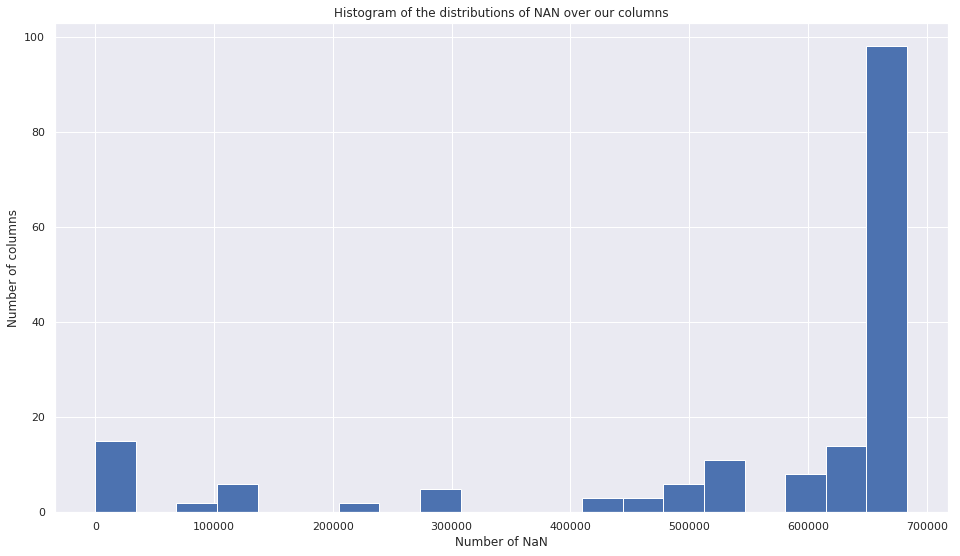

In [5]:
plt.figure(figsize=(16,9))
plt.title('Histogram of the distributions of NAN over our columns')
nan_values_per_column.hist(bins=20)
plt.xlabel('Number of NaN')
plt.ylabel('Number of columns')
plt.show()

So over than 100 columns have more than 600 000 Nan values on around 700 000 entries. We can understand from this that these columns may not be very pertinent.

In [6]:
# A list that contains the feature that have more than 600 000 NAN
list_high_nan = list(nan_values_per_column[nan_values_per_column > 600000].index.values)

Let's use the `WordCloud` package to visualise these features with very high amounts of NAN.

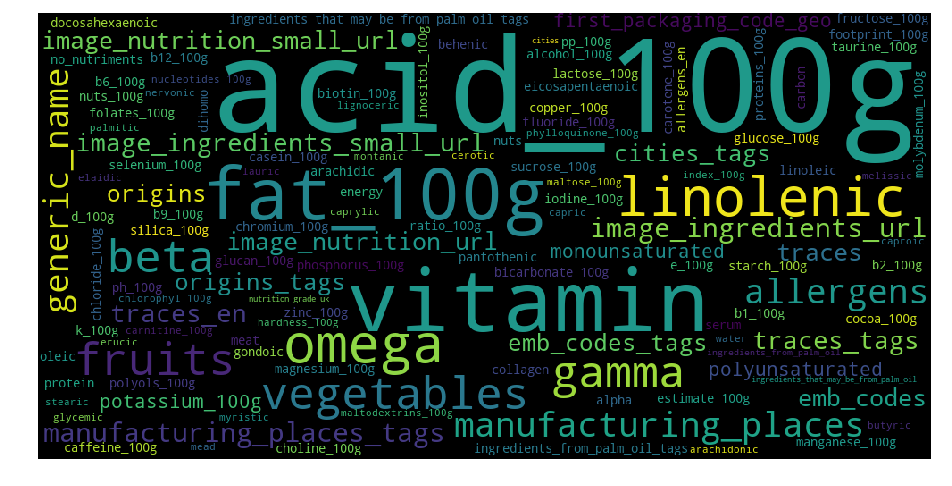

In [7]:
# convert list to string and generate
unique_string=(" ").join(list_high_nan)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [8]:
# How our DataFrame would look like if we remove all the features with the high amounts of NAN.
df_open_food_fact.drop(list_high_nan, axis=1).head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,7.8,1.40,0.551181,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,0.2,2.04,0.803150,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,0.9,0.42,0.165354,NaN,NaN,NaN,NaN,NaN,NaN


We now look at the number of `NAN` for each row and plot its distribution

In [9]:
# Rows containing NAN values
nan_rows = df_open_food_fact.isnull().sum(axis=1).sort_values()
nan_rows.values

array([ 29,  79,  81, ..., 163, 163, 163])

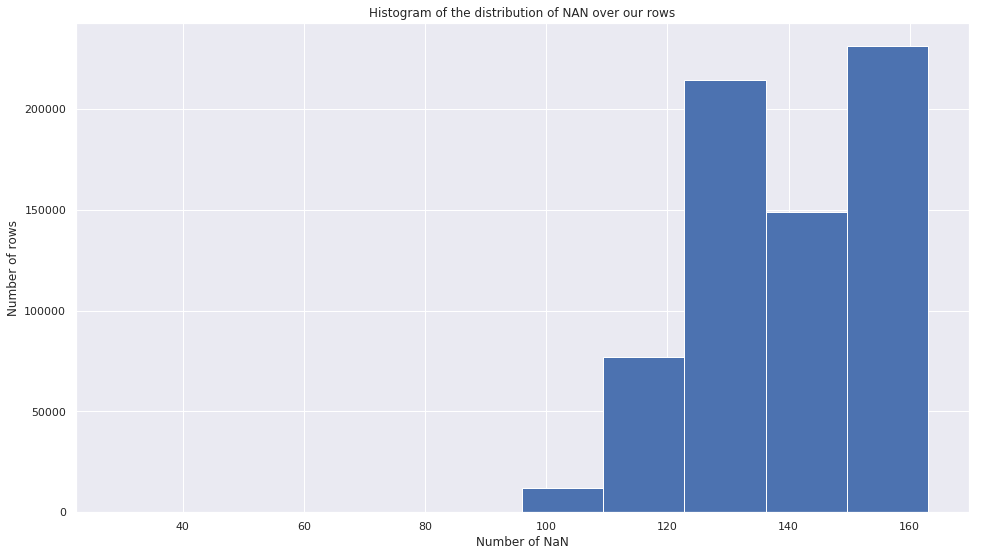

In [10]:
plt.figure(figsize=(16,9))
plt.title('Histogram of the distribution of NAN over our rows')
plt.hist(nan_rows.values)
plt.xlabel('Number of NaN')
plt.ylabel('Number of rows')
plt.show()

We notice that over the rows, we have lots of `NaN` which should not be very surprising due to the number of columns where we almost have only `NaN`.

In [11]:
# The length of rows having less than 100 NAN values in their rows
len(nan_rows[nan_rows < 100])

270

There are only __270__ on 695 207 rows that have less than 100 nan values in their columns!

We can clean the dataset by removing the columns that have very high values of NaN.

In [12]:
# We remove the features that have very high number of nan values, but keep some of them that are relevant even if 
# they also  have high numbers of NAN values

features_to_remove = list(nan_values_per_column[nan_values_per_column > 600000].index.values)
features_to_keep = ['ingredients_from_palm_oil_tags', 'allergens', 'ingredients_that_may_be_from_palm_oil_tags',
                    'traces_tags', 'emb_codes_tags', 'origins_tags', 'cities_tags']

# Removing what should be removed and keeping what should be kept
features_to_remove = [item for item in features_to_remove if item not in features_to_keep]
features_to_remove.extend(['code', 'url', 'creator', 'product_name', 'packaging', 'serving_size', 
                           'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'created_t', 'created_datetime',
                           'last_modified_t', 'last_modified_datetime'])

# When some columns are tags, we remove the redundant column that's not called tags
# We get the list of these redundant columns to remove 
for col in df_open_food_fact.columns.values:
    if 'tags' in col:
        features_to_remove.append(col.replace('_tags', ''))
    if '_en' in col:
        features_to_remove.append(col)
        
# The list of redundant columns to remove
features_to_remove = set(list(features_to_remove))
cleaned_df = df_open_food_fact.drop(features_to_remove, axis=1)
cleaned_df.head()

,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,labels_tags,emb_codes_tags,cities_tags,purchase_places,stores,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.1,15.0,NaN,7.8,1.40,0.551181,NaN,NaN,NaN,NaN
1,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8,0.4,NaN,0.2,2.04,0.803150,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.3,3.9,NaN,0.9,0.42,0.165354,NaN,NaN,NaN,NaN


#### Correcting some mistakes

#### The energy

We know that the energy a product contains can mainly be calculated through his amount of carbs, fat and proteins. We have :
- 1g of fat => 39 Kj.
- 1g of carbohydrates => 17 Kj.
- 1g of protein => 17 Kj.

By calculating the energy based on the features `fat`, `carbohydrates` and `proteins`, then comparing it to the given value of energy we can detect if some entries are wrong.

__REFERENCE:__
https://2012books.lardbucket.org/books/principles-of-general-chemistry-v1.0/s09-04-thermochemistry-and-nutrition.html

In [13]:
# We get the values of Macros, we compute our own energy and then compute the relative error to the energy
# given by the dataset

energy_data = cleaned_df.loc[:,['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'energy_100g']].dropna()
energy_data['calculated_energy'] = 17*energy_data['carbohydrates_100g'] + 17*energy_data['proteins_100g'] + 39*energy_data['fat_100g']
energy_data['error(in %)'] = abs(energy_data['calculated_energy']/energy_data['energy_100g']-1) *100
energy_data.head()

,carbohydrates_100g,proteins_100g,fat_100g,energy_100g,calculated_energy,error(in %)
0,70.1,7.8,7.0,1569.0,1597.3,1.803697
2,4.8,0.2,0.0,88.0,85.0,3.409091
4,5.3,0.9,0.3,134.0,117.1,12.611940
5,16.3,4.4,4.9,540.0,543.0,0.555556
8,38.4,11.7,3.3,929.0,980.4,5.532831


In [14]:
# Small Analysis over these relative errors
energy_data['error(in %)'].replace([np.inf, -np.inf], np.nan).dropna().describe()

count    557598.000000
mean         45.674008
std        1323.838986
min           0.000000
25%           1.371205
50%           2.738275
75%           5.677391
max      509900.000000
Name: error(in %), dtype: float64

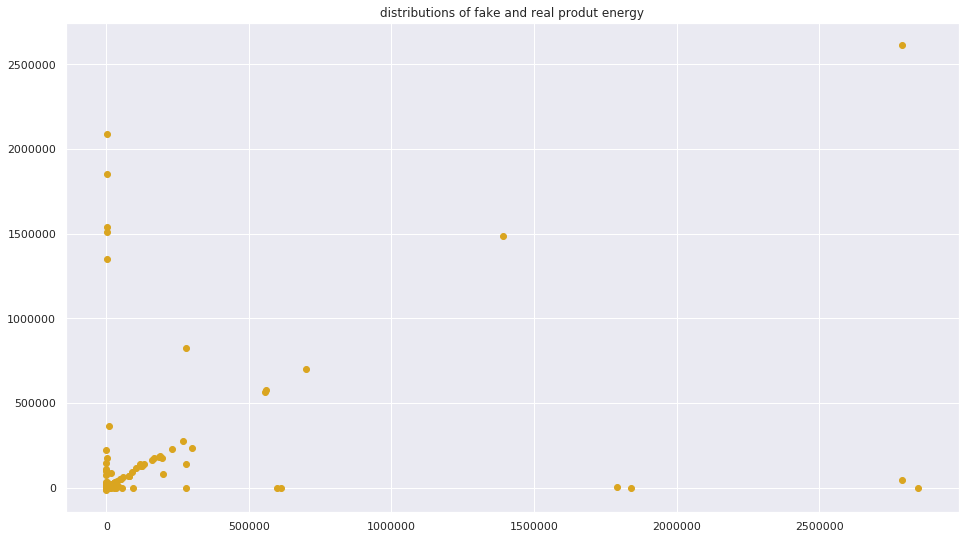

In [15]:
plt.figure(figsize=(16,9))
plt.title('distributions of fake and real produt energy')
plt.scatter(energy_data["energy_100g"], energy_data["calculated_energy"], c= "goldenrod")
plt.show()

We notice that there are a lot of calculated energy values that differ from given energy. Not on the axis `y=x`.  These wrong values may come from wrong input values entered by some users. One of the question we should ask in our analysis afterward is __How to tackle this ?__

An other suspicious thing we noticed is that in some cases we have __Sum of features > 100g ?!__  

Our features (`carbohydrates`, `proteins` and `fats`) are given based on 100g. Then if the sum of theses features is higher than 100, we can conclude that the user inputs wrong values. So we can drop these rows.

In [16]:
# We compute the sum over these macros
energy_data["g_sum"] = energy_data['carbohydrates_100g'] + energy_data['proteins_100g'] + energy_data['fat_100g']
# We assign 1 anytime we exceed 100
energy_data["exceeded"] = np.where(energy_data.g_sum.values > 100, 1, 0)
# We count the number of occurences of this issue
energy_data[energy_data.exceeded == 1].count()

carbohydrates_100g    2614
proteins_100g         2614
fat_100g              2614
energy_100g           2614
calculated_energy     2614
error(in %)           2614
g_sum                 2614
exceeded              2614
dtype: int64

There are __2685__ wrong values (sum of the features > 100g), out of 588 209 values. We can drop them.

### 2. Data Visualization

#### A. Quality of food

Now that we cleaned the data, we can revisit the features we have and visualize how many Nan values they have relatively

_WordMap of the kept columns_

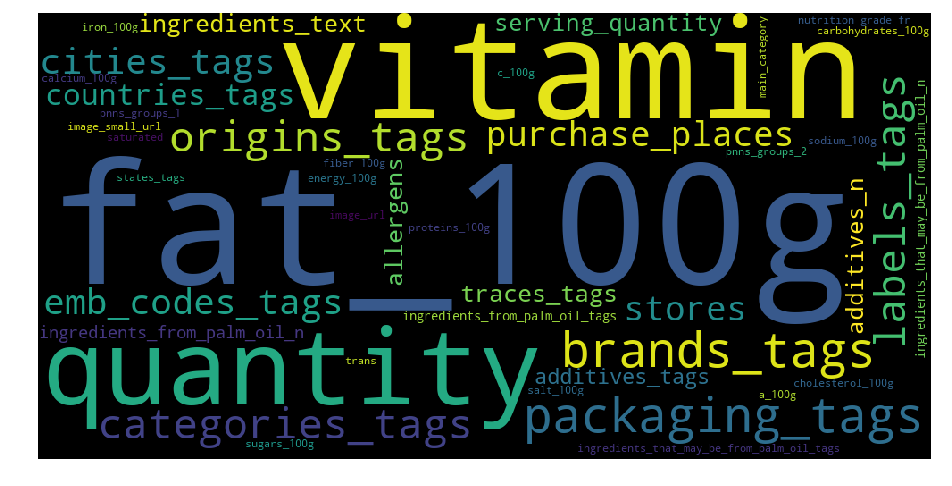

In [17]:
columns_kept = list(cleaned_df.columns.values)
# convert list to string and generate
unique_string=(" ").join(columns_kept)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

#### Products with additives

In [18]:
# We take only the products where we have additives
products_w_additives = cleaned_df.loc[:,['main_category','additives_n']].dropna()[cleaned_df.additives_n > 0]
sum_products_w_additives = products_w_additives.groupby('main_category').sum().\
                        sort_values(by=['additives_n'], ascending=False)

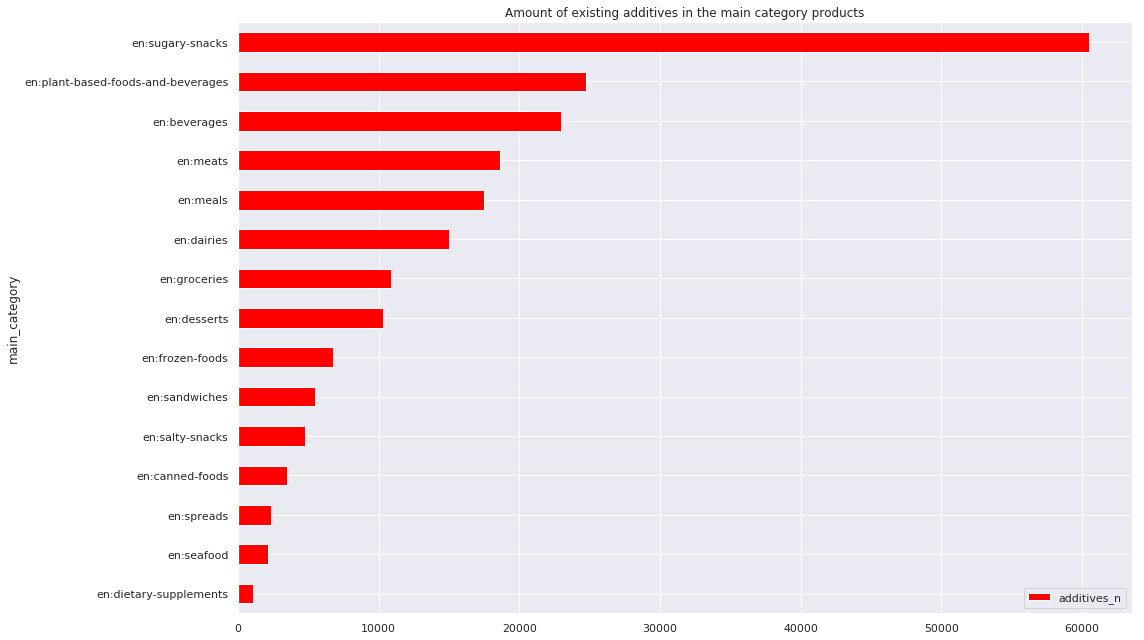

In [19]:
# We plot the amount of additives existing in the main category groupby of products
sum_products_w_additives[:15][::-1].plot(kind='barh', figsize=(16,9), color='red')
plt.title('Amount of existing additives in the main category products')
plt.tight_layout()
plt.show()

<font size="3">We notice that this plot is not really significant because the number of products of each category can greatly differ from a category to an other. Hence, it is preferable to look at the __averaged amounts__ of additives per product in each category.</font>

In [20]:
# We take only the products where we have additives
avg_products_w_additives = products_w_additives.groupby('main_category').mean().\
                        sort_values(by=['additives_n'], ascending=False)

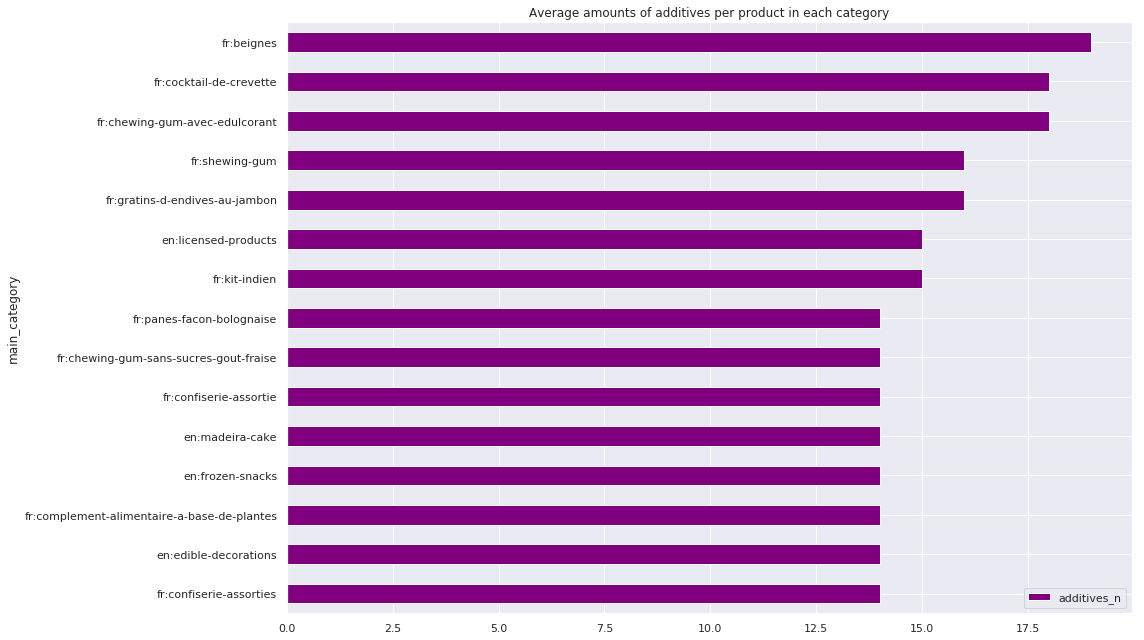

In [21]:
# We plot the amount of additives existing in the main category groupby of products
avg_products_w_additives[:15][::-1].plot(kind='barh', figsize=(16,9), color='purple')
plt.title('Average amounts of additives per product in each category')
plt.tight_layout()
plt.show()

<font size="3">As we thought, looking at the average amounts of additives per product in each category is more representative than looking only at the sum of additives over all products per category. We notice that the categories completely changed. We can assert that on average, the categories presented on the plot have the most amount of additives.</font>

#### Products with Palm Oil

In [22]:
# Products that are likely to contain palm oil
likely_palm_products = cleaned_df.loc[:,['main_category', 'ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
likely_palm_products.groupby('main_category').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_that_may_be_from_palm_oil_n
main_category,
en:sugary-snacks,5204.0
en:plant-based-foods-and-beverages,2625.0
en:desserts,1470.0
en:meals,945.0
en:dairies,770.0


In [23]:
palm_products = cleaned_df.loc[:,['main_category', 'ingredients_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
palm_products.groupby('main_category').sum().sort_values(by=['ingredients_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_from_palm_oil_n
main_category,
en:sugary-snacks,1215.0
en:plant-based-foods-and-beverages,351.0
en:meals,180.0
en:desserts,133.0
en:frozen-foods,102.0


The products containing ingredients from palm oil / may be from palm oil are especially from:
    - Sugary and salty snacks
    - Plan based food and beverages
    - Meals   

However, we should be aware that this shows us the number of products containing palm oil but not esepcially the products with the most amount of ingredients coming from palm oil. In the following -just like what we did for additives- we will dig into the average in order to get the products with large amount of ingredients coming from palm oil.  

In order to do this, we focus our analysis on products containing palm oil and also on those that "likely" contain palm oil.

<font size="4"><center> Average amounts of likely palm oil ingredients per category </font><center>

In [24]:
likely_palm_products.groupby('main_category').mean().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_that_may_be_from_palm_oil_n
main_category,
es:preparacion-para-pasteles,6.0
fr:brioches-a-la-creme-patissiere,5.0
fr:pain-sandwich,3.0
ru:булочки,3.0
fr:viennoiseries-et-brioches,3.0


<font size="4"><center> Average amounts of palm oil ingredients per category </font><center>

In [25]:
palm_products.groupby('main_category').mean().sort_values(by=['ingredients_from_palm_oil_n'], \
                                                         ascending=False).head()

,ingredients_from_palm_oil_n
main_category,
fr:friands-a-la-viande,1.0
fr:brote,1.0
fr:bouchees-a-garnir,1.0
fr:zakouski,1.0
fr:pate-a-gateau,1.0


<font size="3">Conclusion :</font>

While looking at the number of products __containing/likely_containing__ palm oil, we noticed that `sugary and salty snacks` were on the top of our analysis. However, when we look at the average amounts per category, we notice that we have some categories that are less present in the dataset but with higher likely amounts of palm oil, esepcially `bakery products`.

#### Countries with Palm Oil

We first create a function that is going to split the countries tags with several countries in order to compute more precisely our counts.

In [26]:
def split_tags_df(df, tags_to_split, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, tags_to_split, separator):
        split_row = row[tags_to_split].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[tags_to_split] = s
            row_accumulator.append(new_row)
    new_rows = []
    df = df.dropna(subset=[tags_to_split])
    df.apply(splitListToRows, axis=1, args = (new_rows, tags_to_split, separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [27]:
# dataframe with distinct countries tags
cleaned_df = split_tags_df(cleaned_df, 'countries_tags', ',')

In [61]:
df = cleaned_df.groupby('countries_tags').size().reset_index(name='counts')
df[df['counts']>10]

,countries_tags,counts
9,ch:suisse,60
11,de:allemagne,100
39,en:albania,56
41,en:algeria,478
45,en:andorra,27
50,en:argentina,177
51,en:armenia,40
53,en:australia,2676
54,en:austria,823
55,en:azerbaijan,21


In [ ]:
countries_occurences = cleaned_df['countries_tags'].dropna().value_counts()

We know plot a figure of the occurences of the countries to see how countries are represented in our dataset

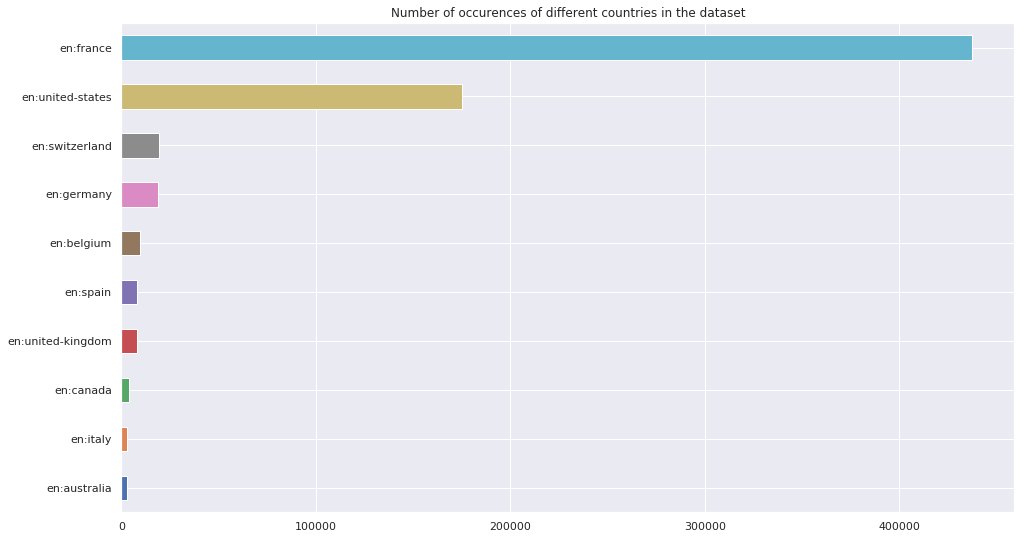

In [29]:
plt.figure(figsize=(16,9))
plt.title('Number of occurences of different countries in the dataset')
countries_occurences[:10][::-1].plot.barh()
plt.show()

We look at the number of products with 100% probability that it has ingredients from palm oil for each country

In [30]:
palm_countries = cleaned_df.loc[:,['countries_tags','ingredients_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]

palm_countries_grouped = palm_countries.groupby('countries_tags').sum()\
                        .sort_values(by=['ingredients_from_palm_oil_n'],ascending=False)

palm_countries_grouped.head()

,ingredients_from_palm_oil_n
countries_tags,
en:france,3275.0
en:switzerland,332.0
en:belgium,130.0
en:united-kingdom,49.0
en:germany,24.0


Text(0.5,1,'Certain occurences of palm oil in products per countries')

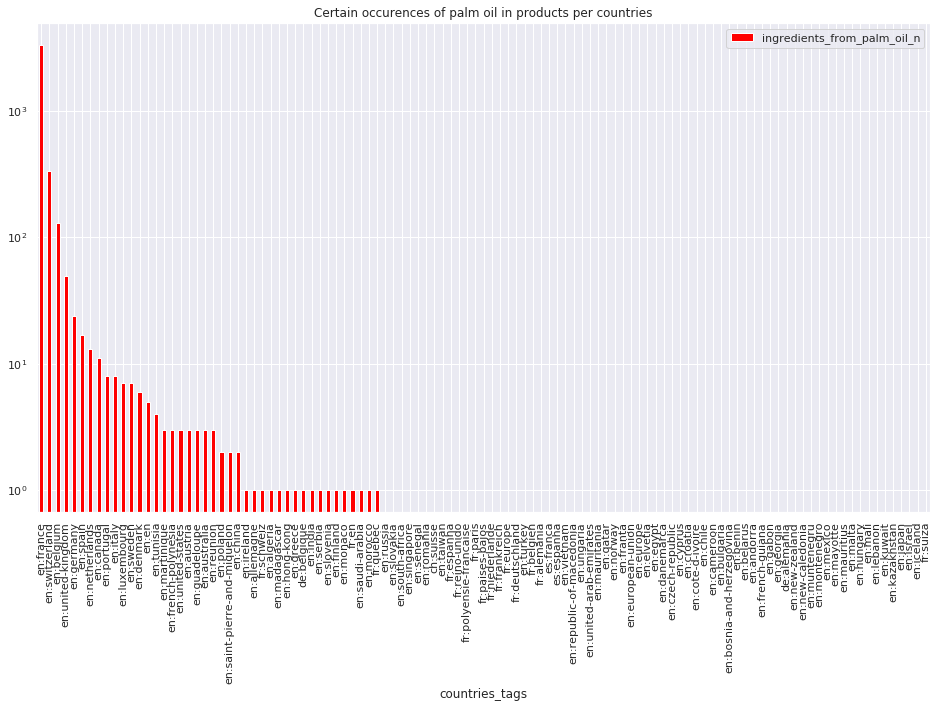

In [31]:
# The distribution of the number of certain products containing palm oil over countries
palm_countries_grouped.plot(kind='bar', figsize=(16,9), logy=True, color='red')
plt.title('Certain occurences of palm oil in products per countries')

We look at the number of products with uncertain ingredients from palm oil over the different countries.

In [32]:
palm_countries = cleaned_df.loc[:,['countries_tags','ingredients_that_may_be_from_palm_oil_n']]\
                .dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]

palm_countries_grouped = palm_countries.groupby('countries_tags').sum()\
                        .sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False)

palm_countries_grouped.head()

,ingredients_that_may_be_from_palm_oil_n
countries_tags,
en:france,21033.0
en:united-states,4203.0
en:switzerland,1320.0
en:belgium,550.0
en:spain,293.0


Text(0.5,1,'Unertain occurences of palm oil in products per countries')

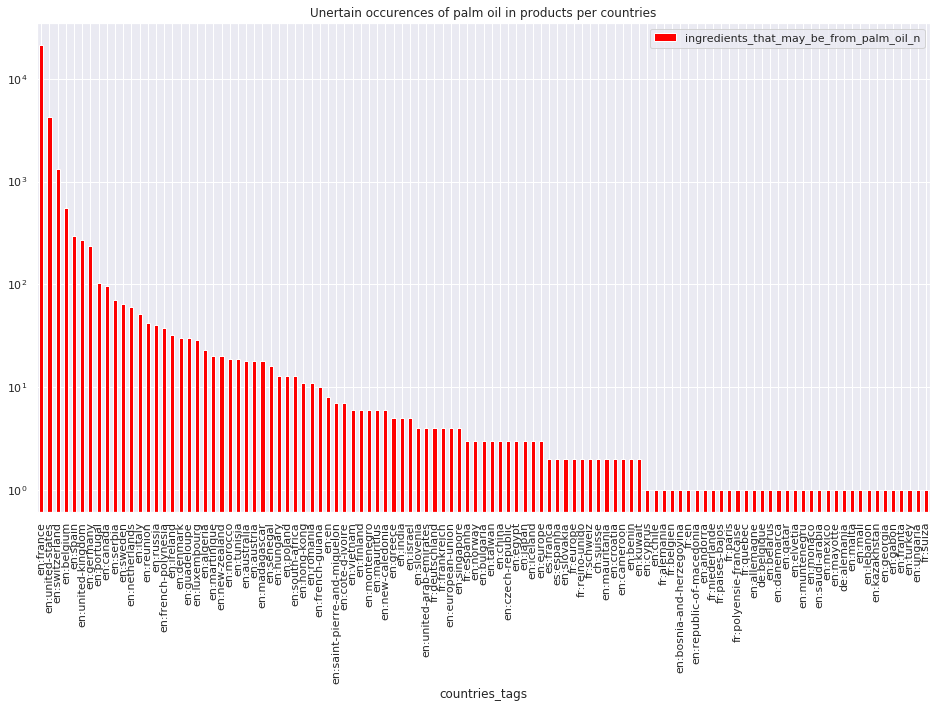

In [33]:
# The distribution of the number of uncertain products containing palm oil over countries
palm_countries_grouped.plot(kind='bar', figsize=(16,9), logy=True, color='red')
plt.title('Unertain occurences of palm oil in products per countries')

**France** and **USA** are the countries that are the most represented in the dataset

**France, Switzerland** and **Belgium** are the countries that have the most products with ingredients containing palm oil. (France probably because it is the most represented country in the dataset). However, by comparing the above both analysis, what we really notice is that we still have lots of products where we have uncertainity concerning the existence of the palm oil which is quite suspicious.

#### B. Carbon footprint

#### the goods with the highest carbon foodprint.

In [34]:
df_open_food_fact['carbon-footprint_100g'].describe()

count     342.000000
mean      271.528992
std       405.252492
min        -0.000281
25%         2.300000
50%       150.000000
75%       338.750000
max      2842.000000
Name: carbon-footprint_100g, dtype: float64

In [35]:
# Products containing highest amounts of carbon footprints
carbon_print = df_open_food_fact.loc[:,['main_category', 'carbon-footprint_100g']]\
                .dropna()[df_open_food_fact['carbon-footprint_100g']>0]
carbon_print.groupby('main_category').sum().sort_values(by=['carbon-footprint_100g'], ascending=False).head()

,carbon-footprint_100g
main_category,
en:sugary-snacks,25226.1000
en:meats,11430.0000
en:beverages,10297.0000
en:dairies,9960.5547
en:plant-based-foods-and-beverages,9949.5600


We notice that the highest amounts of carbon-footpring are contained in __Sugar__, then meats and beverages.  
Something interesting is that this carbon footpring tend to get high also with __meats__. Which is something that is very known, lots of studies have showed that meets are inderectly one of the most polluants concerning carbon footprint.

------------------------------------------------------------
------------------------------------------------------------